In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#reading the training dataset
data_train = pd.read_csv('SalaryData_Train(1).csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
#Checking for blanks
data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
#storing the categorical columns for plotting
cat_col = [col for col in data_train.select_dtypes(object).columns if col != 'Salary']
cat_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

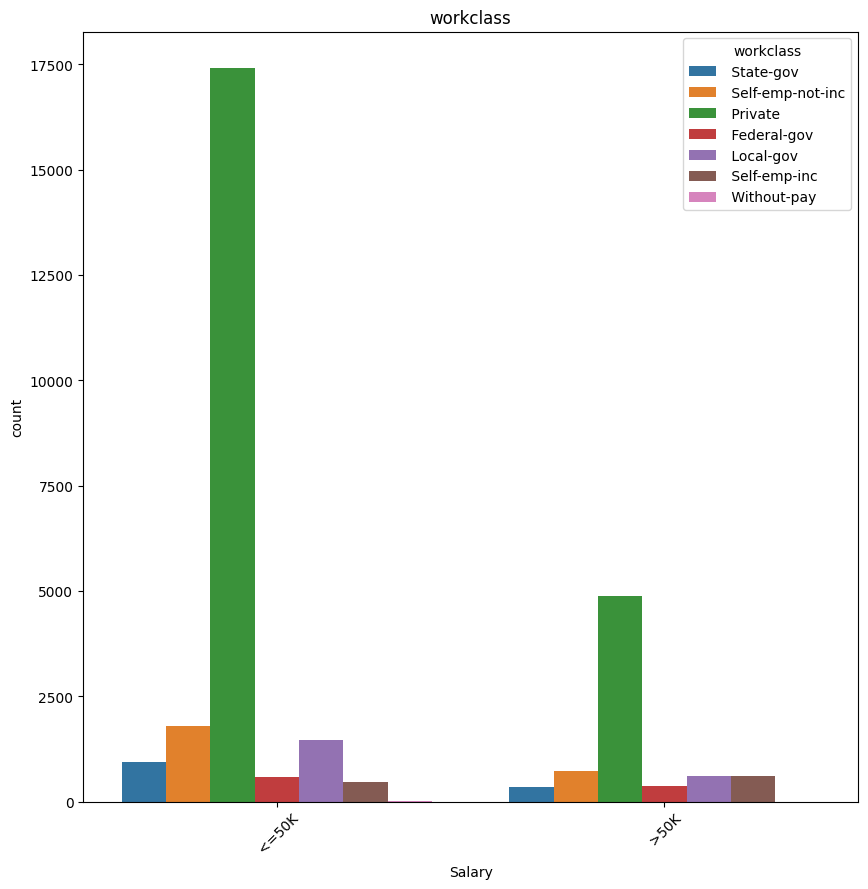

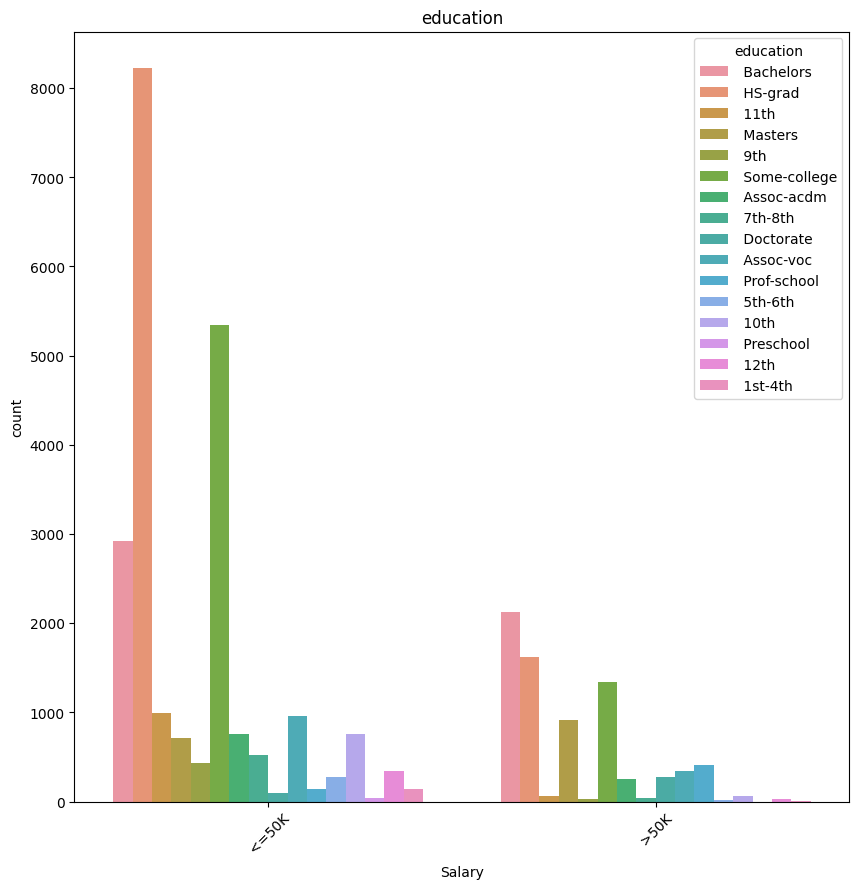

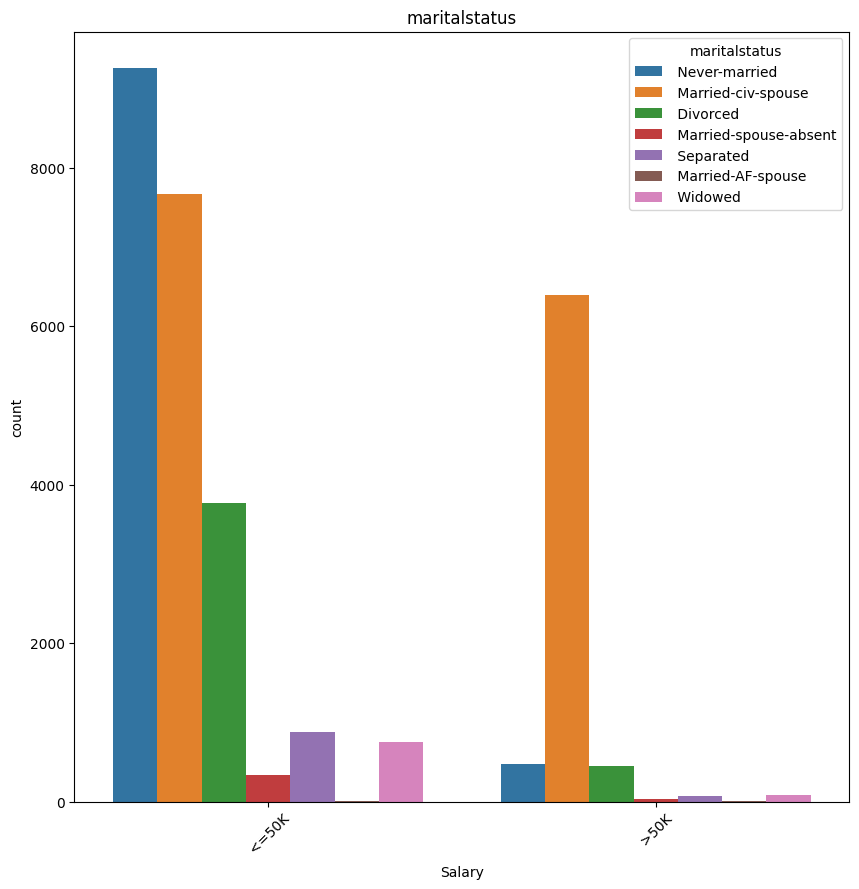

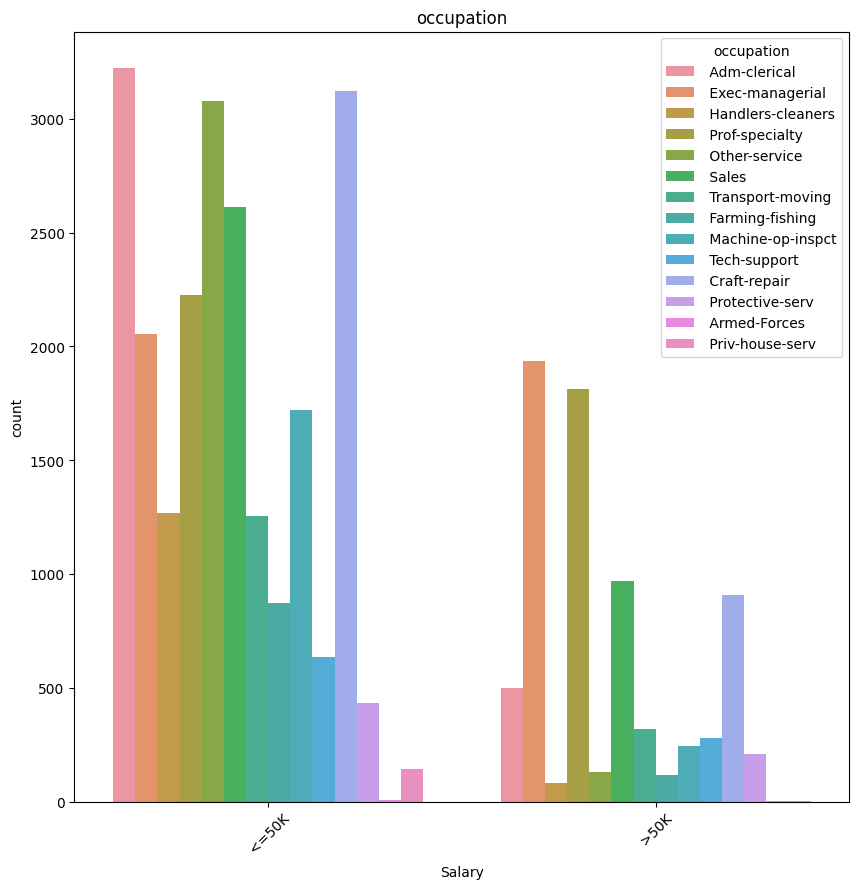

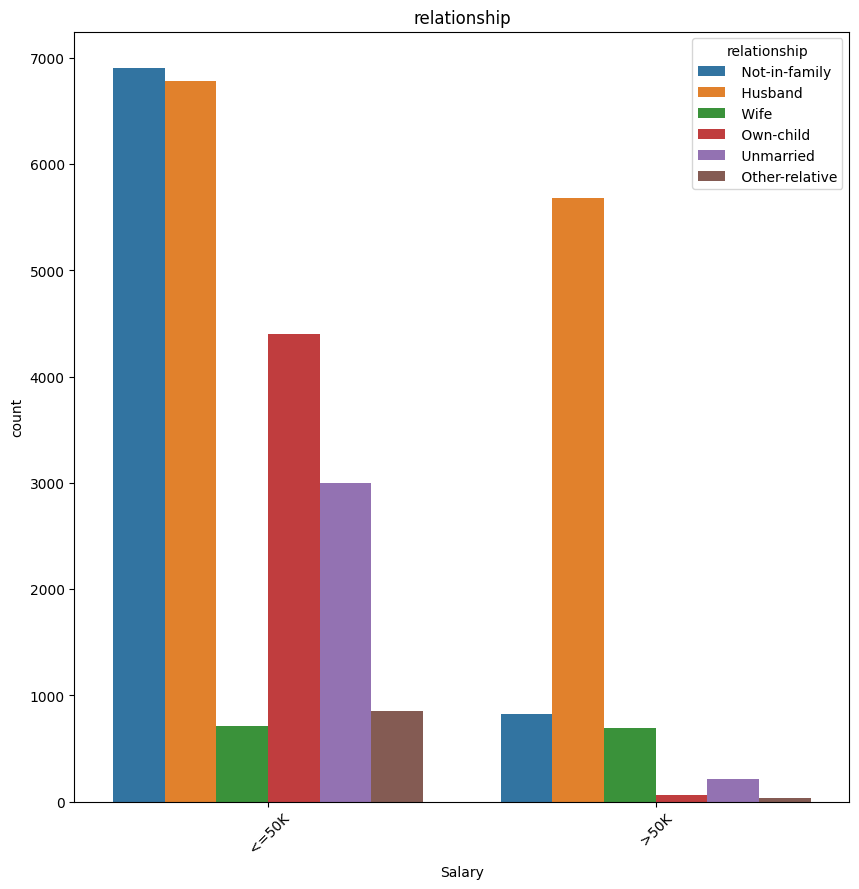

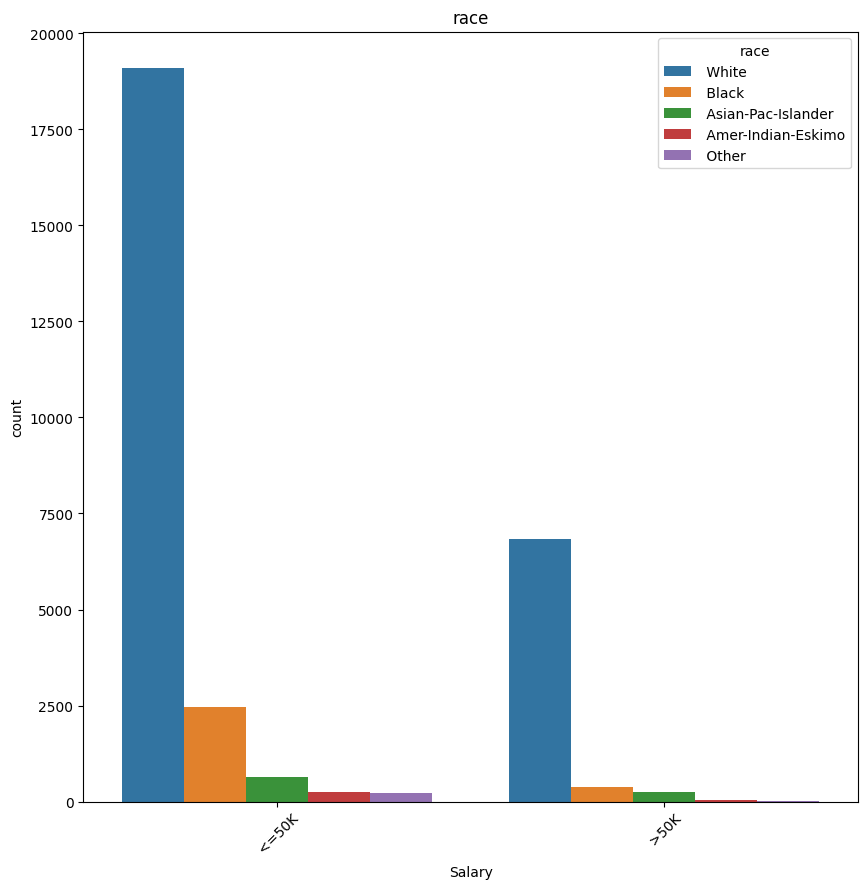

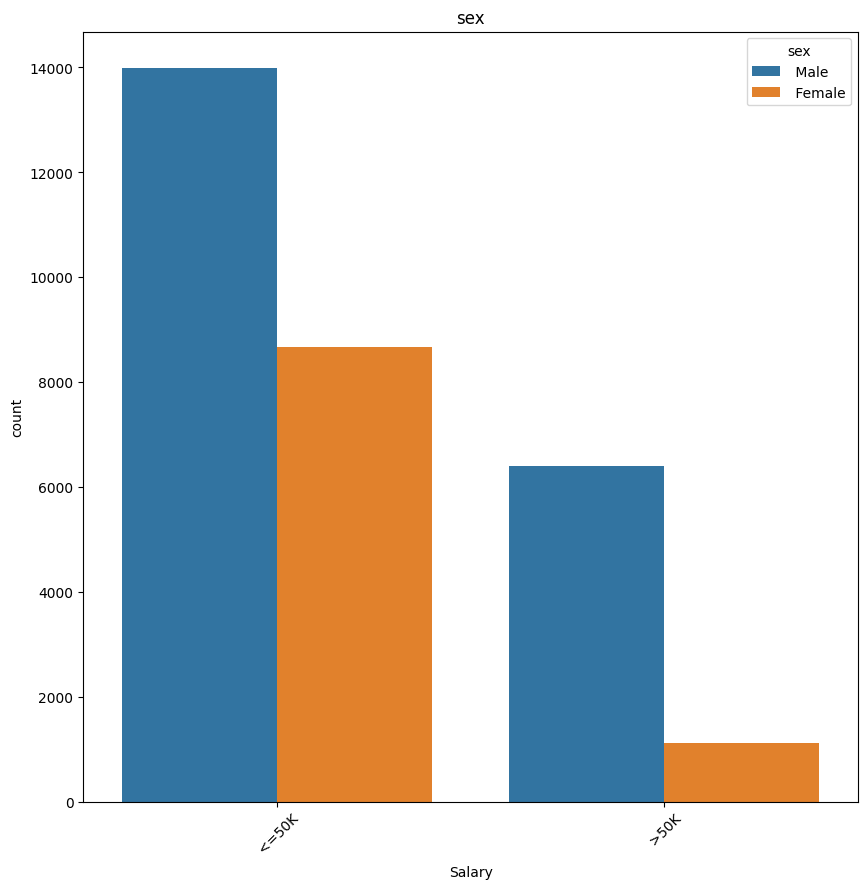

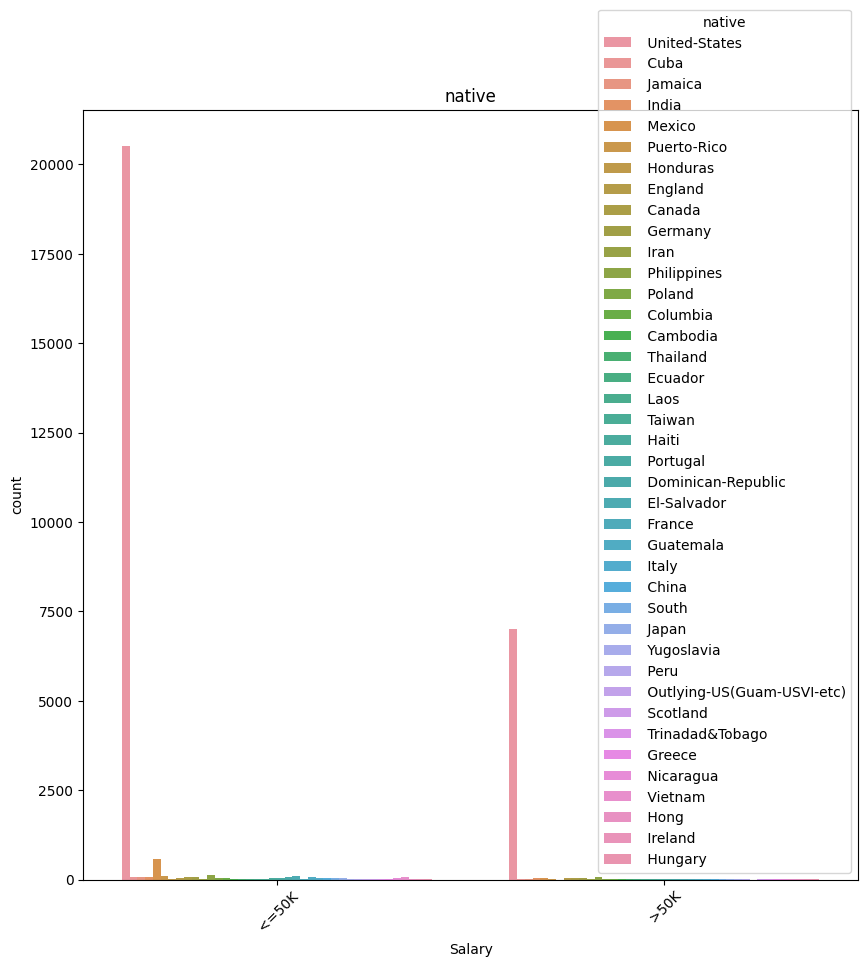

In [6]:
#plotting countplots for all the numerical variables
d= cat_col
for i in cat_col:
  plt.figure(figsize = (10,10))
  sns.countplot(data_train, x =data_train['Salary'], hue= data_train[i])
  plt.title(i)
  plt.xticks(rotation = 45)
  plt.show()

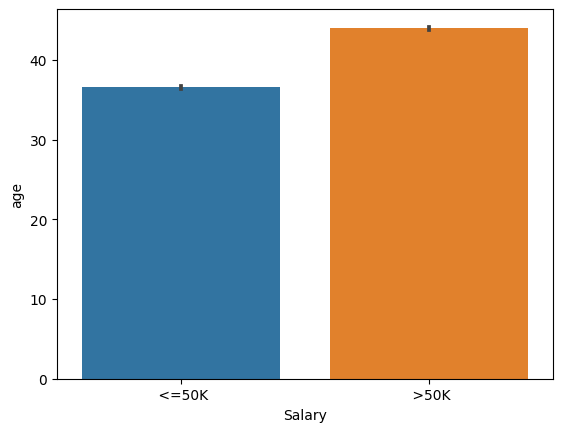

In [7]:
#Plotting a countplot of months with size category
sns.barplot(x =data_train['Salary'], y = data_train['age'])
plt.show()

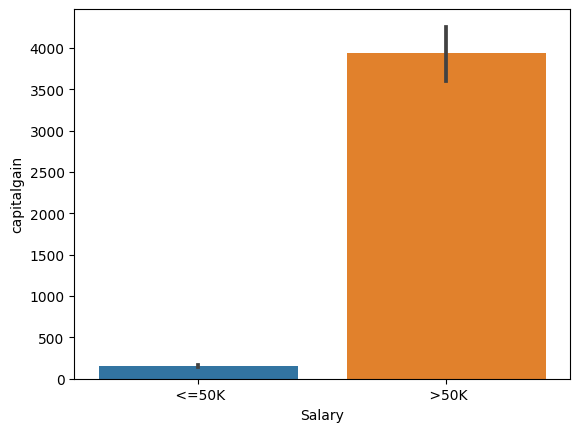

In [8]:
#Plotting a countplot of months with size category
sns.barplot(x =data_train['Salary'], y =data_train['capitalgain'])
plt.show()

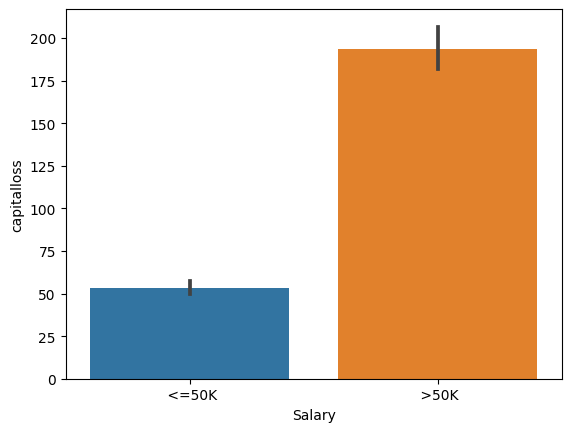

In [9]:
#Plotting a countplot of months with size category
sns.barplot(x =data_train['Salary'], y =data_train['capitalloss'])
plt.show()

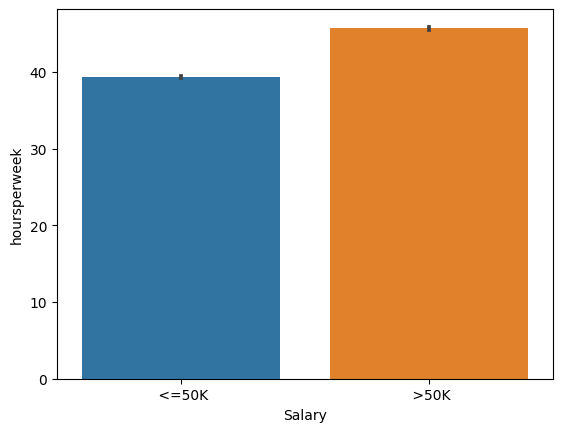

In [10]:
#Plotting a countplot of months with size category
sns.barplot(x =data_train['Salary'], y =data_train['hoursperweek'])
plt.show()

In [11]:
#using label encoder to convert the salary column into binary form
le = LabelEncoder()
data_train['Salary'] = le.fit_transform(data_train['Salary'])
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
#using Label Encoder to convert size_category from categorical to a labels
categ_col = [col for col in data_train.select_dtypes(object).columns]
categ_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [13]:
data_train= pd.get_dummies(data_train, columns = categ_col)
data_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#splitting the data into dependent and independent variables
x = data_train.drop(['Salary'], axis = 1)
y = data_train['Salary']

In [15]:
#Splitting the data into training and testing part in order decrease the sample size
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.2, random_state = 44)

In [16]:
#Building a SVM model and fitting the training data
svm = SVC()
svm.fit(xtrain, ytrain)

SVC()

In [17]:
#Predicting the testing values
y_pred = svm.predict(xtest)

In [18]:
#printing the Accuracy Score
print(f"Accuracy : {accuracy_score(ytest, y_pred)*100:0.2f}%")

Accuracy : 79.65%


In [19]:
#printing the confusion matrix
confusion_matrix(ytest, y_pred)

array([[4389,  142],
       [1086,  416]])

In [20]:
#printing the classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4531
           1       0.75      0.28      0.40      1502

    accuracy                           0.80      6033
   macro avg       0.77      0.62      0.64      6033
weighted avg       0.79      0.80      0.76      6033



#Using the testing set to predict the values

In [21]:
#reading the testing dataset
data_test = pd.read_csv('SalaryData_Test(1).csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [22]:
#using label encoder to convert the salary column into binary form
le = LabelEncoder()
data_test['Salary'] = le.fit_transform(data_test['Salary'])
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [23]:
data_test= pd.get_dummies(data_test, columns = categ_col)
data_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
testing_xtest = data_test.drop(['Salary'], axis=1)
testing_ytest = data_test['Salary']

In [25]:
y_pred_test = svm.predict(testing_xtest)

In [26]:
#printing the Accuracy Score
print(f"Accuracy : {accuracy_score(testing_ytest, y_pred_test)*100:0.2f}%")

Accuracy : 79.64%


In [27]:
#printing the confusion matrix
confusion_matrix(testing_ytest, y_pred_test)

array([[10997,   363],
       [ 2703,   997]])

In [28]:
#printing the classification report
print(classification_report(testing_ytest, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

